In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn')
import pandas as pd
import numpy as np

params = {
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'axes.labelsize':12,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal',
}
rcParams.update(params)

width = 4.963
height = width * .75

In [2]:
data = pd.read_csv('../data/result.csv')

In [3]:
data

,IRAS,RA1950,DE1950,Fnu_12,e_Fnu_12,Fnu_25,e_Fnu_25,Fnu_60,e_Fnu_60,Fnu_100,e_Fnu_100
0,02174+6052,34.358333,60.871389,0.8799,6,2.3630,6,32.010,0,127.90,0
1,02156+6045,33.915417,60.766111,0.2729,0,0.3631,13,3.601,18,44.14,0
2,02157+6053,33.928333,60.891111,0.8217,16,1.3090,13,21.800,16,215.10,0
3,02168+6052,34.211250,60.870000,2.1570,24,2.1790,22,32.010,0,127.90,14
4,02165+6053,34.137500,60.891389,0.3451,25,1.7190,15,1.850,0,215.10,0
5,02171+6058,34.286250,60.971667,0.3587,15,1.8400,6,11.610,10,63.52,17
6,02160+6057,34.021250,60.960556,2.4030,16,2.9900,20,47.370,20,215.10,16


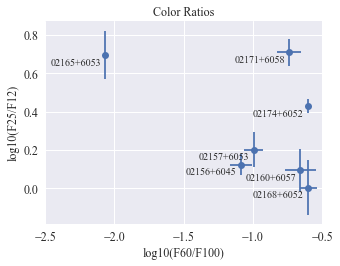

In [4]:
x = np.log10(data['Fnu_60'] / data['Fnu_100'])
y = np.log10(data['Fnu_25'] / data['Fnu_12'])
xerr = 1/(100 * np.log(10)) * np.sqrt(data['e_Fnu_60']**2 + data['e_Fnu_100']**2)
yerr = 1/(100 * np.log(10)) * np.sqrt(data['e_Fnu_25']**2 + data['e_Fnu_12']**2)


plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o')
[plt.annotate(data['IRAS'][i], r, xytext=(-55, -10), textcoords='offset points') for i, r in enumerate(zip(x, y))]
plt.title('Color Ratios')
plt.ylabel('log10(F25/F12)')
plt.xlabel('log10(F60/F100)')
plt.xlim(-2.5, -.5)
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/figs/colors.pdf')

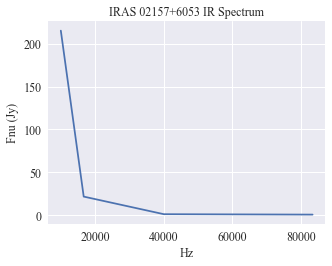

In [5]:
obj = data[data.IRAS == '02157+6053']
waves = np.array([12, 25, 60, 100])
freqs =  1 / (waves * 1e-6)
y = obj[['Fnu_12', 'Fnu_25', 'Fnu_60', 'Fnu_100']].values
yerr = obj[['e_Fnu_12', 'e_Fnu_25', 'e_Fnu_60', 'e_Fnu_100']].values * y / 100

plt.plot(freqs, y.flatten())
plt.title('IRAS 02157+6053 IR Spectrum')
plt.ylabel('Fnu (Jy)')
plt.xlabel('Hz')
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/figs/spectrum.pdf')

In [6]:
from scipy.integrate import simps
F_T = simps(y.flatten(), freqs)
L = F_T * 4 * np.pi * (2300*3.086e16 )**2 * 1e-26 
L / 3.846e26

1.9486714856837283e-08

In [7]:
tmass = pd.read_csv('../data/2mass.csv')
tmass.fillna(0)

,_Glon,_Glat,RAJ2000,DEJ2000,2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
0,133.3442,0.0389,34.835133,61.120991,02192043+6107155,16.974,0.000,15.292,0.106,14.239,0.090,UAA,22,11,0,0,0
1,133.3417,0.0422,34.832579,61.124966,02191981+6107298,15.820,0.063,14.053,0.040,13.274,0.031,AAA,222,111,0,0,0
2,133.3542,0.0422,34.856937,61.120834,02192566+6107150,18.317,0.000,16.165,0.000,15.340,0.151,UUC,2,1,0,0,0
3,133.3541,0.0447,34.858394,61.123180,02192601+6107234,18.293,0.000,16.278,0.161,14.858,0.107,UCB,22,11,0,0,0
4,133.3477,0.0375,34.841009,61.118584,02192184+6107069,14.362,0.045,12.412,0.045,11.044,0.025,AAA,222,111,0,1,0
5,133.3424,0.0365,34.829935,61.119396,02191918+6107098,16.616,0.000,16.119,0.155,14.836,0.104,UCA,22,11,0,0,0
6,133.3443,0.0405,34.836449,61.122482,02192074+6107209,16.135,0.085,15.394,0.120,15.458,0.205,ABC,222,111,00c,0,0
7,133.3487,0.0425,34.846349,61.122910,02192312+6107224,17.316,0.258,15.495,0.085,14.223,0.063,DAA,222,111,c00,0,0
8,133.3520,0.0428,34.853145,61.122124,02192475+6107196,16.280,0.000,14.649,0.081,13.119,0.057,UAA,622,22,0cc,0,0
9,133.3511,0.0432,34.851606,61.122772,02192438+6107219,16.234,0.000,15.163,0.079,13.791,0.064,UAA,622,22,0cc,0,0


In [8]:
intrin = pd.read_csv('../data/intrinsic.csv')
intrin['J-H'] = intrin['J-K'] - intrin['H-K']

1.682 0.196


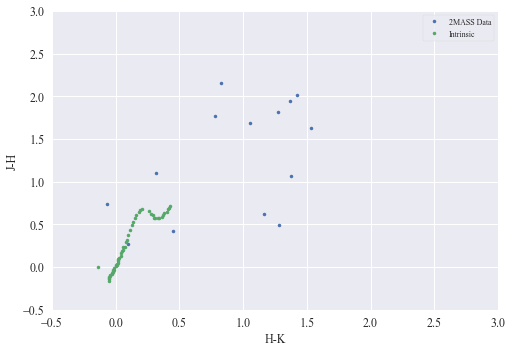

In [9]:
y = tmass['Jmag'] - tmass['Hmag']
x = tmass['Hmag'] - tmass['Kmag']
yerr = tmass['e_Jmag'] + tmass['e_Hmag']
xerr = tmass['e_Hmag'] + tmass['e_Kmag']
print(y[0], xerr[0])
plt.plot(x, y, '.', label='2MASS Data')
plt.plot(intrin['H-K'], intrin['J-H'], '.', label='Intrinsic')
plt.legend(frameon=True)
plt.xlim(-.5, 3)
plt.ylim(-.5, 3)
plt.xlabel('H-K')
plt.ylabel('J-H')

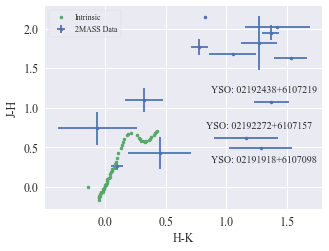

In [47]:
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='.' ,label='2MASS Data')
plt.plot(intrin['H-K'], intrin['J-H'], '.', label='Intrinsic')
plt.legend(frameon=True)
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.annotate('YSO: '+tmass.iloc[10]['2MASS'], (x[10], y[10]), xytext=(-40, 10), textcoords='offset points', )
plt.annotate('YSO: '+tmass.iloc[9]['2MASS'], (x[9], y[9]), xytext=(-60, 10), textcoords='offset points', ) 
plt.annotate('YSO: '+tmass.iloc[5]['2MASS'], (x[5], y[5]), xytext=(-50, -15), textcoords='offset points', )
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/figs/intrinsic.pdf')